<a href="https://colab.research.google.com/github/Welle-Kim/Python/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EA%B8%B0%EB%B0%98_%ED%83%84%EC%86%8C_%EA%B0%90%EC%B6%95_2%EC%9D%BC%EC%B0%A8(%ED%95%9C%EC%BB%B4%EC%95%84%EC%B9%B4%EB%8D%B0%EB%AF%B8_%EC%A3%BC%EC%B5%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
# MER_T12_06 에너지 발전소에서 발생한 탄소 배출량을 기록한 데이터
# 미래 탄소 배출량을 예측, 및 분석, 시각화 진행
# csv 데이터란? -> 컴마(comma) 분리 (seperated) 데이터(value)

%matplotlib inline 
import numpy as np # 넘파이 라이브러리 가져오고, np 로 앞으로 부르겠다


import pandas as pd  
import matplotlib.pylab 
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,16 


In [112]:
import warnings # 경고 문구 무시
import itertools # 반복문을 더 쉽게 작성할 수 있게하는 라이브러리
warnings.filterwarnings('ignore')

In [113]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')

df = pd.read_csv('/content/MER_T12_06.csv', parse_dates=['YYYYMM'], index_col = 'YYYYMM',
                 date_parser=dateparse)
df.head(1)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [114]:
df.Column_Order.value_counts()

1    566
2    566
3    566
4    566
5    566
6    566
7    566
8    566
9    566
Name: Column_Order, dtype: int64

In [115]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]


In [116]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [117]:
ts.dropna(inplace = True)

In [118]:
#na = nan = 비어있는 데이터 
Energy_sources = ts.groupby('Description')
Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


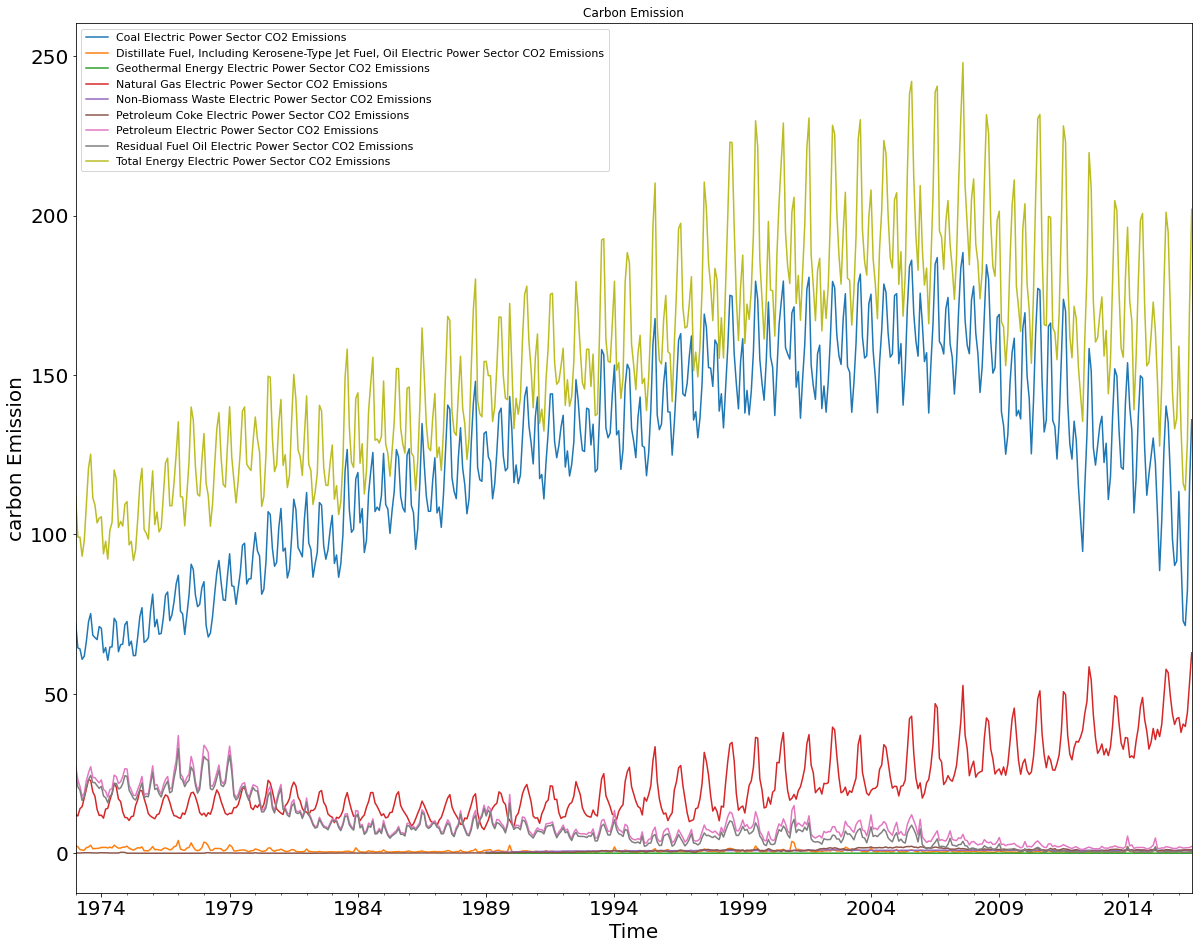

In [119]:
fig, ax = plt.subplots()
for desc ,group in Energy_sources:
    group.plot(y='Value', label=desc, ax = ax, title = 'Carbon Emission', fontsize=20)
    ax.set_xlabel('Time')
    ax.set_ylabel('carbon Emission')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize=11)

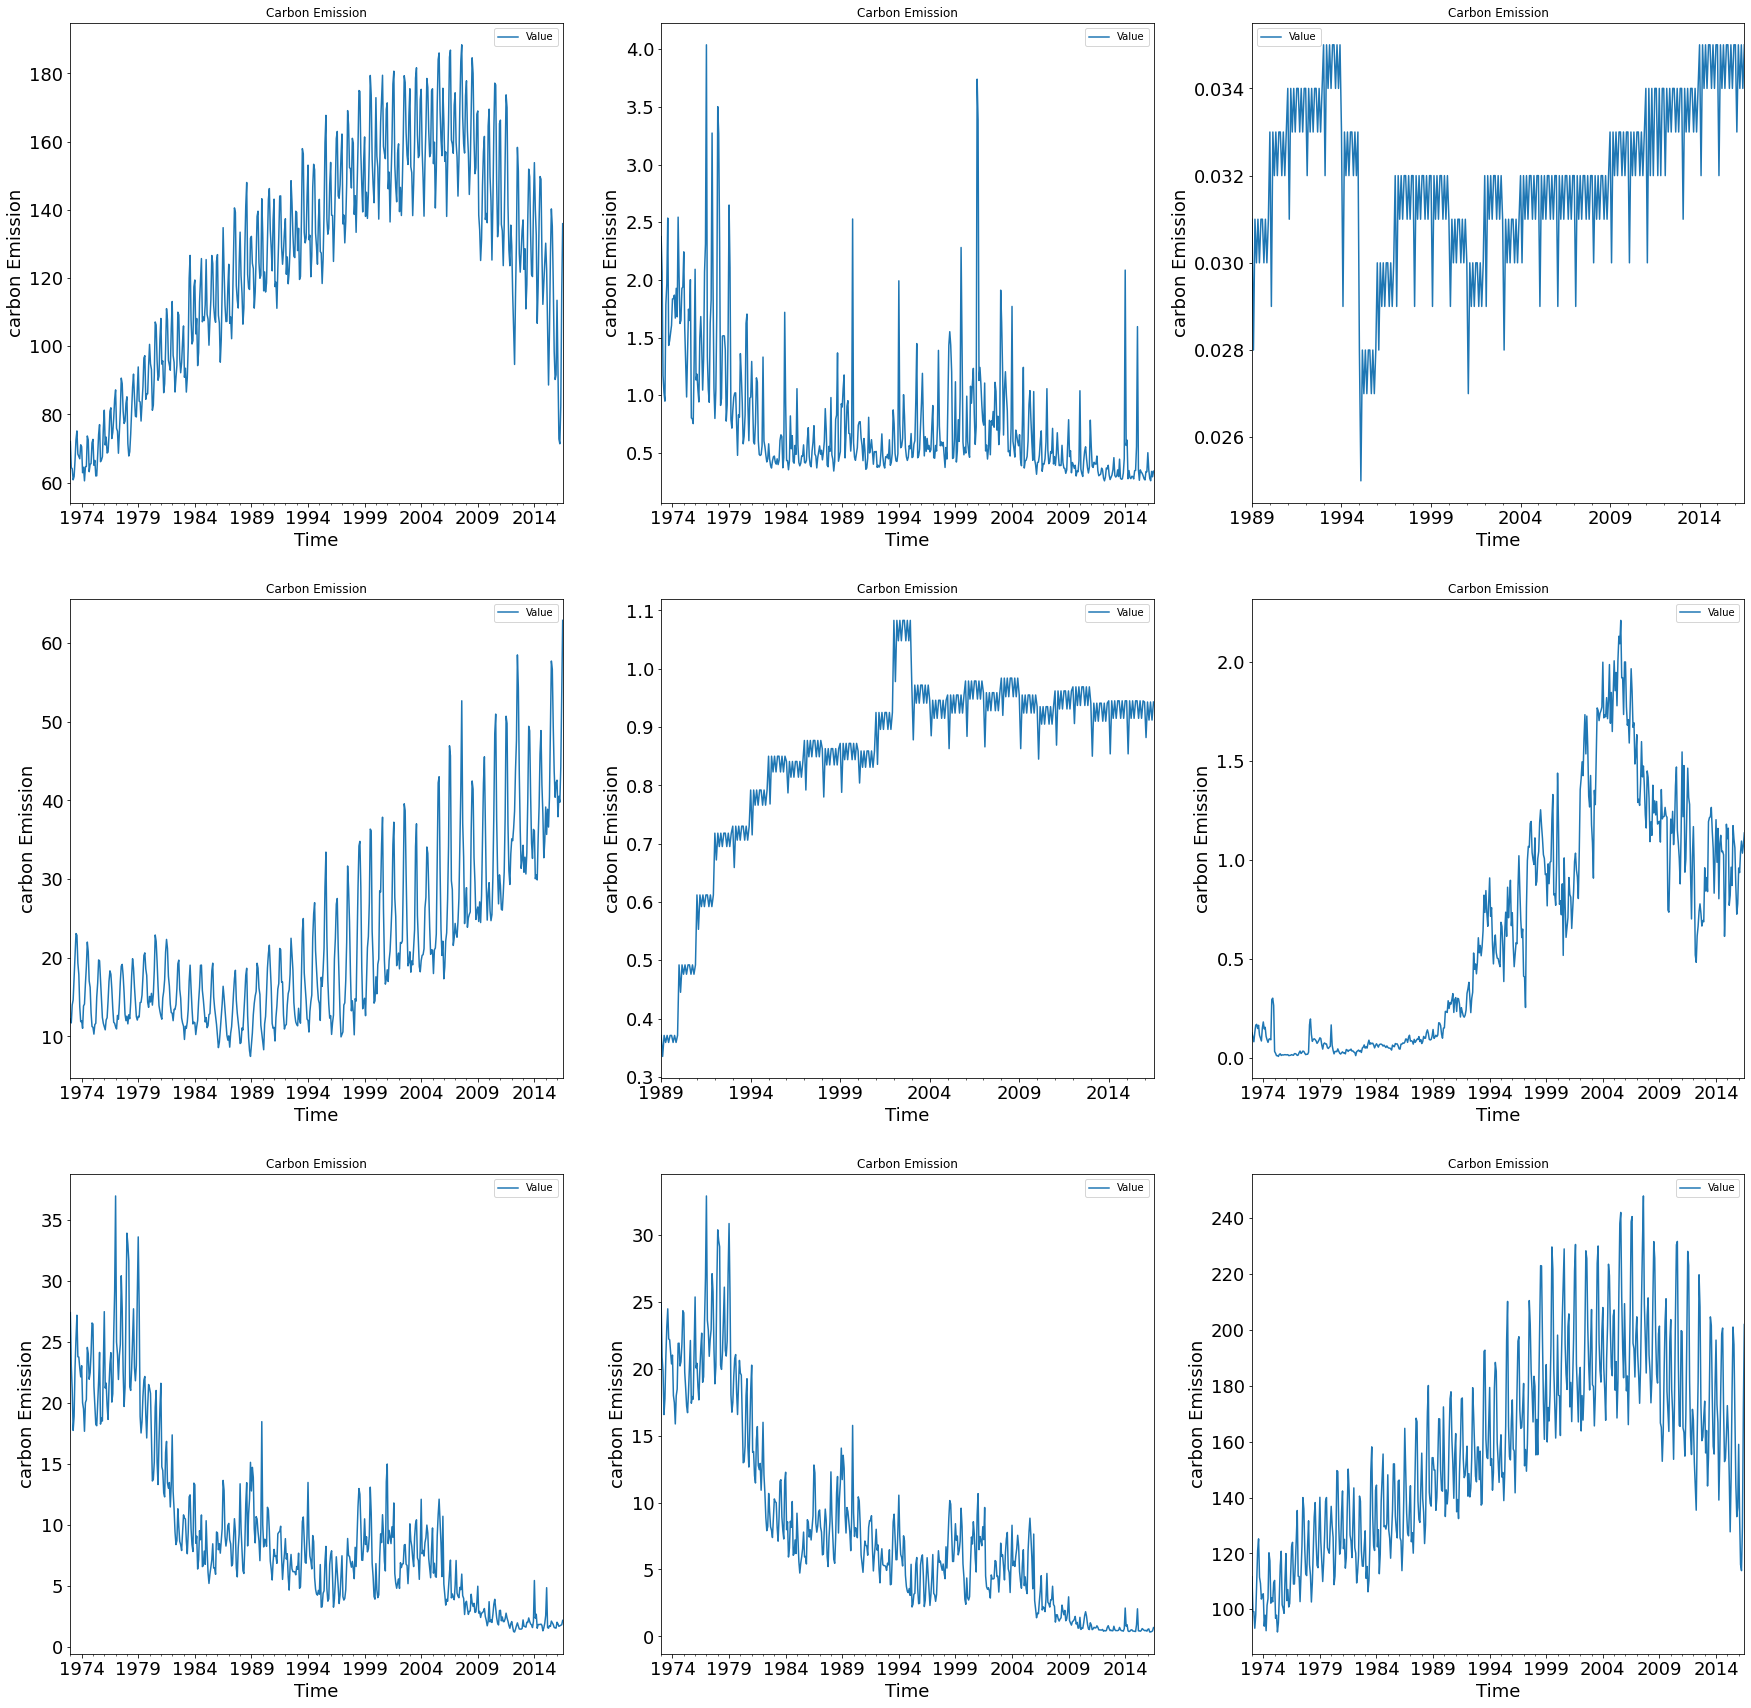

In [120]:
fig, axes = plt.subplots(3,3,figsize=(30,30))
for (desc ,group),ax in zip(Energy_sources,axes.flatten()):
    group.plot(y='Value', ax = ax, title = 'Carbon Emission', fontsize=18)
    ax.set_xlabel('Time')
    ax.set_ylabel('carbon Emission')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
  

In [121]:
co2_per_source=ts.groupby("Description")["Value"].sum().sort_values()

In [122]:
co2_per_source.index

# 지열 에너지 전력 부문에 대한 탄소 배출량
# 비 - 바이오 메스 폐기물 에 대한 탄소 배출량
# 석유 코크스 전력 부문 에 대한 탄소 배출량
# 등유 연료에 대한 탄소 배출량
# 잔여 연료유 전력 부문에 대한 탄소 배출량
# 석유 전력 부문에 대한 탄소 배출량
# 천연가스 탄소 배출
# 석탄 전력 탄소 배출
# 총 에너지 전력 탄소 배출

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [123]:
cols=["Geothlmar Energy","non-boi","petroleum-coke","distill","residual","petrileum","natural","coal","total"]

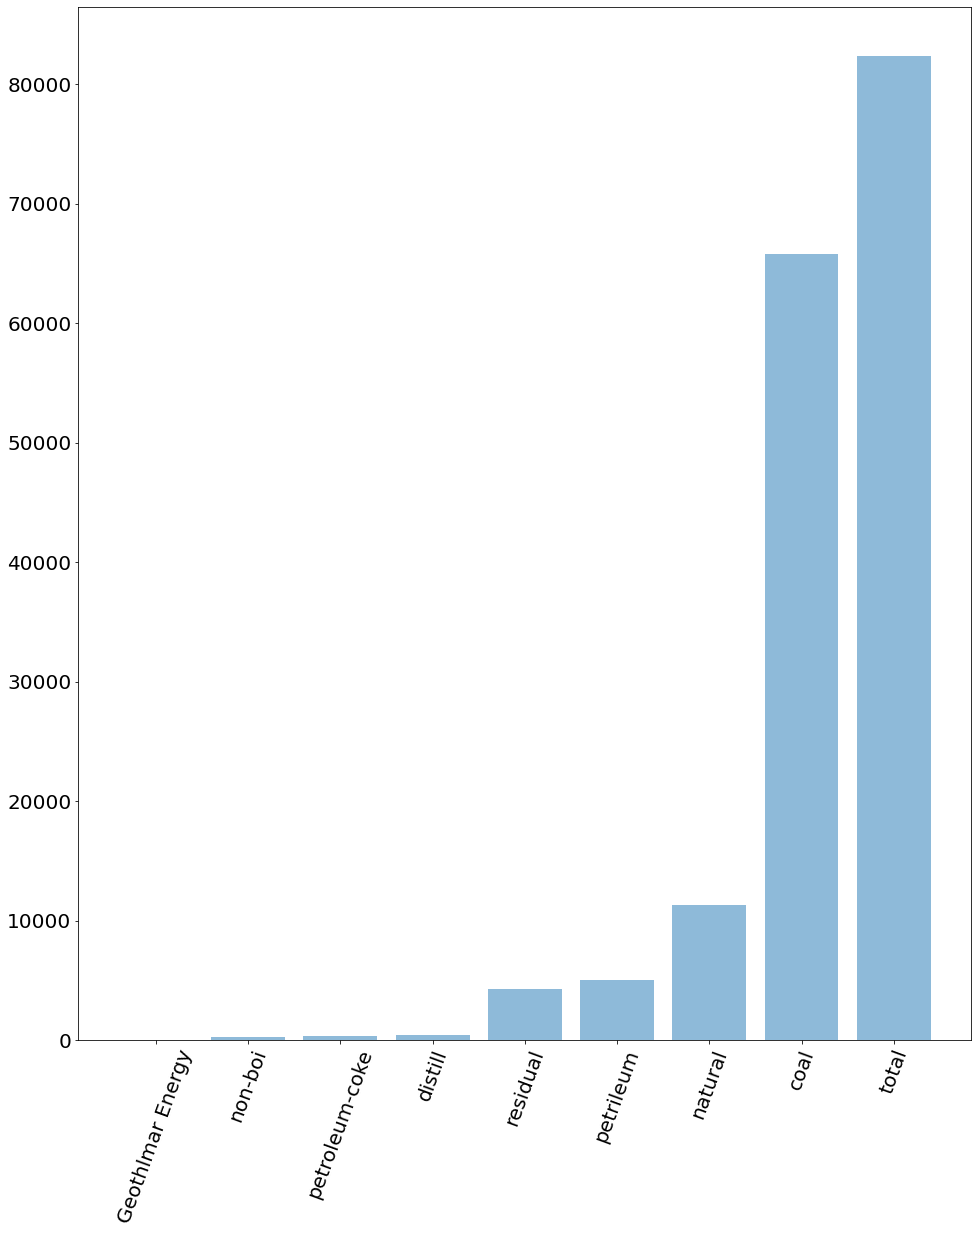

In [124]:
fig=plt.figure(figsize=(16,19))
x_label=cols
x_tick=np.arange(len(cols))
plt.bar(x_tick,co2_per_source,align="center",alpha=0.5)
plt.xticks(x_tick,x_label,rotation=70,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [125]:
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [126]:
Emission=ts.iloc[:,1:] #MSN열은 빼고 정리하기
Emission.head()

,Value,Column_Order,Description,Unit
YYYYMM,,,,
1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [127]:
Emission=Emission.groupby(["Description", pd.Grouper(freq="M")])["Value"].sum().unstack(level=0)
Emission

Description,Coal Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Geothermal Energy Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Petroleum Coke Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
YYYYMM,,,,,,,,,
1973-01-31,72.076,2.375,NaN,12.175,NaN,0.128,27.369,24.867,111.621
1973-02-28,64.442,2.061,NaN,11.708,NaN,0.106,23.034,20.867,99.185
1973-03-31,64.084,1.171,NaN,13.994,NaN,0.083,21.034,19.780,99.112
1973-04-30,60.842,1.022,NaN,14.627,NaN,0.130,17.714,16.562,93.183
1973-05-31,61.798,0.949,NaN,17.344,NaN,0.167,18.870,17.754,98.012
...,...,...,...,...,...,...,...,...,...
2016-03-31,72.840,0.279,0.035,40.525,0.943,1.041,1.654,0.334,115.997
2016-04-30,71.410,0.259,0.034,39.763,0.912,1.096,1.695,0.340,113.815
2016-05-31,82.510,0.340,0.035,44.210,0.943,1.035,1.743,0.368,129.440


In [128]:
mte=Emission["Natural Gas Electric Power Sector CO2 Emissions"]
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [129]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

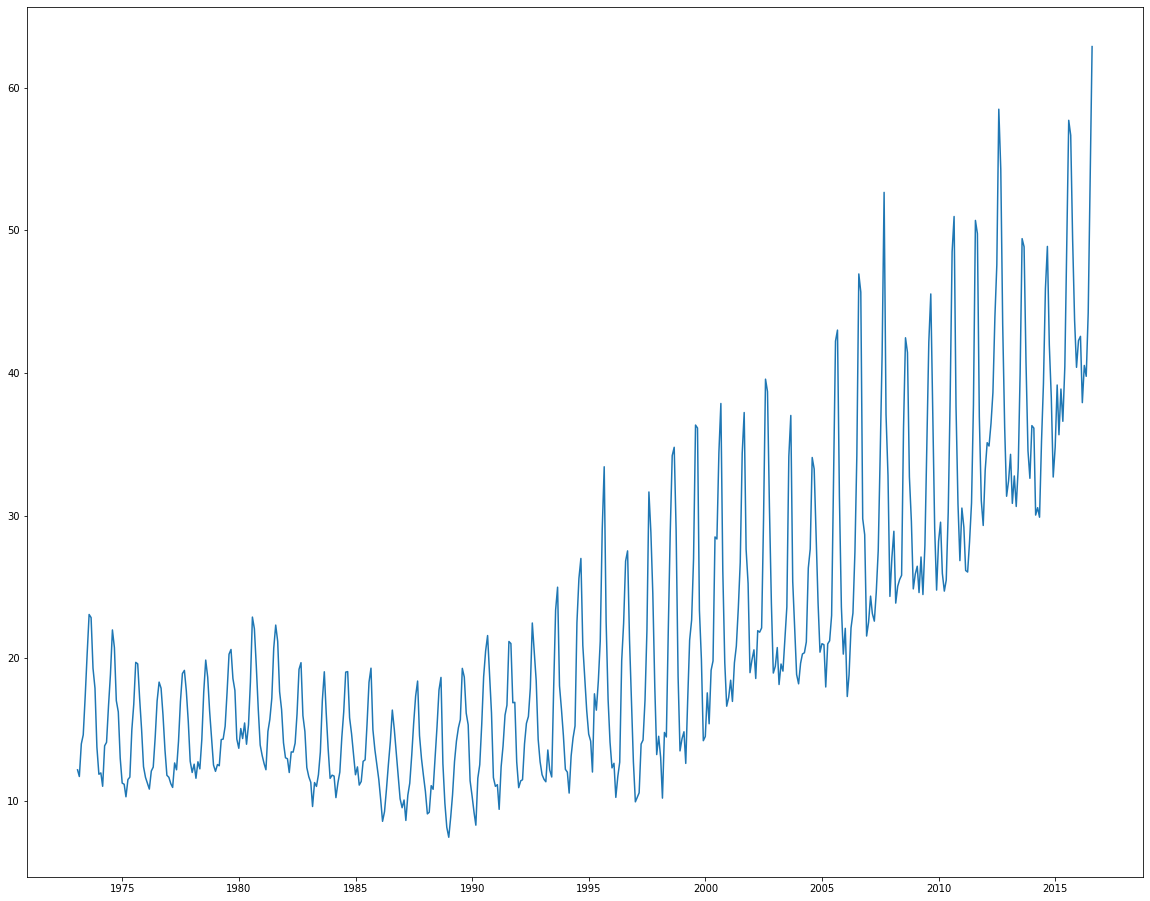

In [130]:
plt.plot(mte)

In [131]:
def TestStationaryPlot(ts):
  rol_mean=ts.rolling(window=12,center=False).mean()
  rol_std=ts.rolling(window=12,center=False).std() #표준편차

  plt.plot(ts,color="blue",label="Original Data")
  plt.plot(rol_mean,color="red",label="Rolling Std")
  plt.plot(rol_std,color="black", label="Roiing Std")
  plt.xticks(fontsize=24)
  plt.yticks(fontsize=24)

  plt.legend(loc="best",fontsize=25)
  plt.show(block=True)

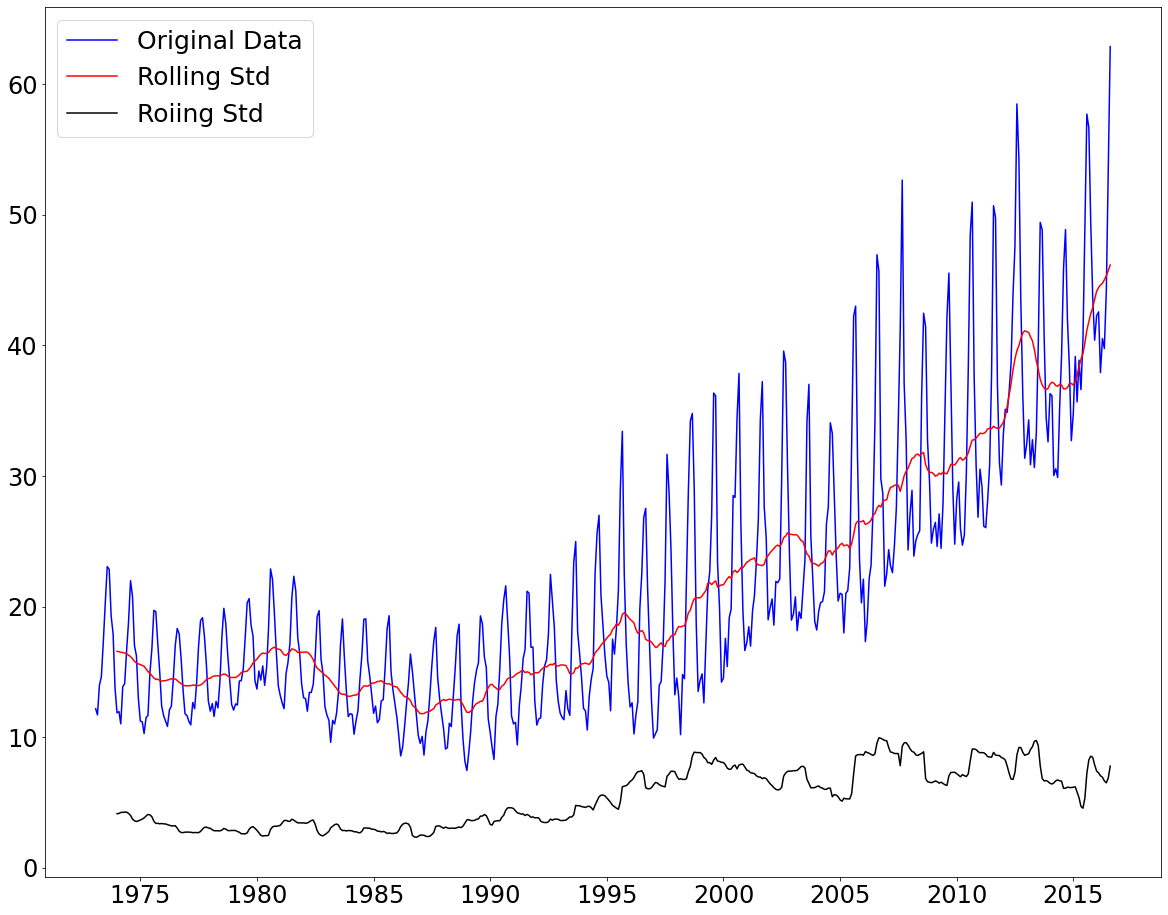

In [132]:
TestStationaryPlot(mte)

In [133]:
def TestStationaryAdfuller(ts, cutoff=0.01):
  ts_test=adfuller(ts, autolag="AIC") #시계열의 형식을 띄는지 안띄는지 확인
  ts_test_output=pd.Series(ts_test[0:4], index=["Test","p-value","lags use","observations used"])
  for key,value in ts_test[4].items():
    ts_test_output["Critical value (%s)"%key]=value
  print(ts_test_output)

In [134]:
TestStationaryAdfuller(mte)

Test                      1.831215
p-value                   0.998409
lags use                 19.000000
observations used       503.000000
Critical value (1%)      -3.443418
Critical value (5%)      -2.867303
Critical value (10%)     -2.569840
dtype: float64


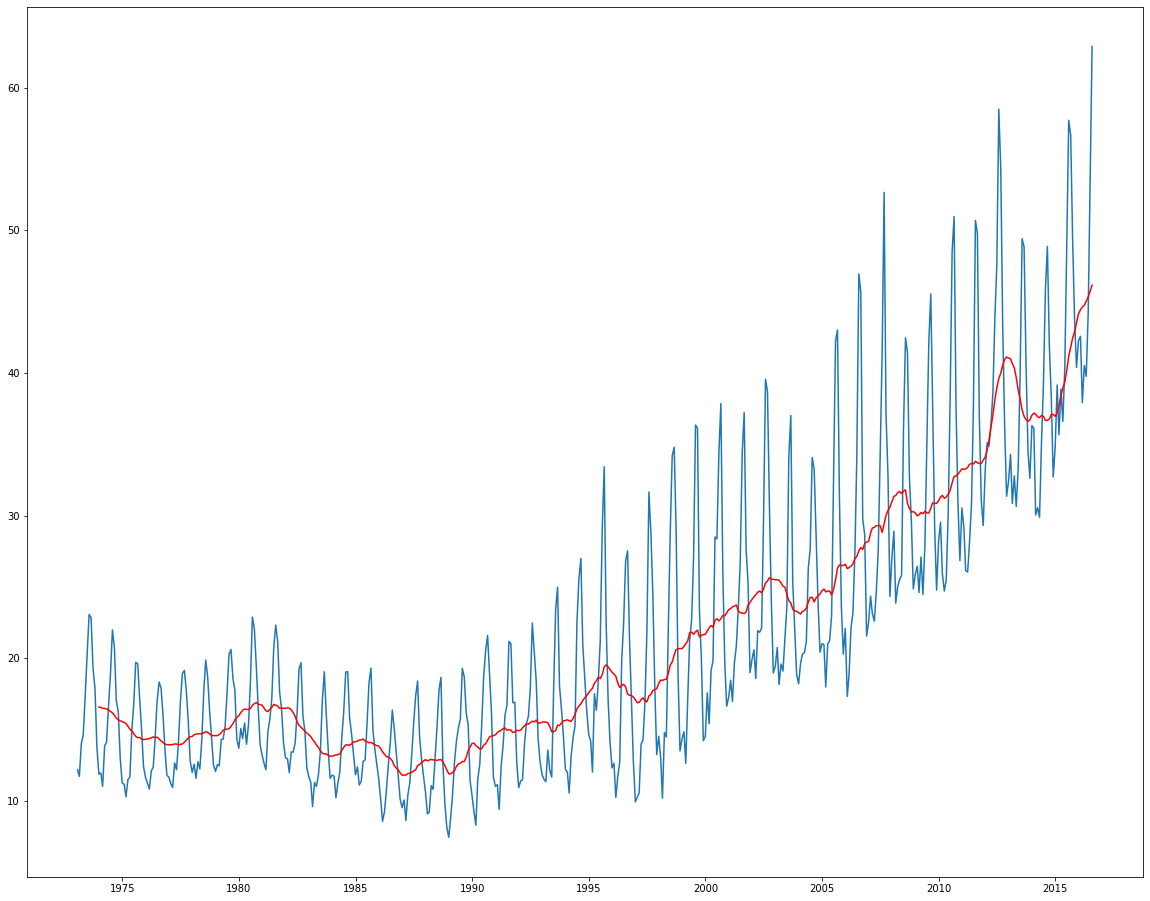

In [135]:
moving_avg=mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_avg,color="red")

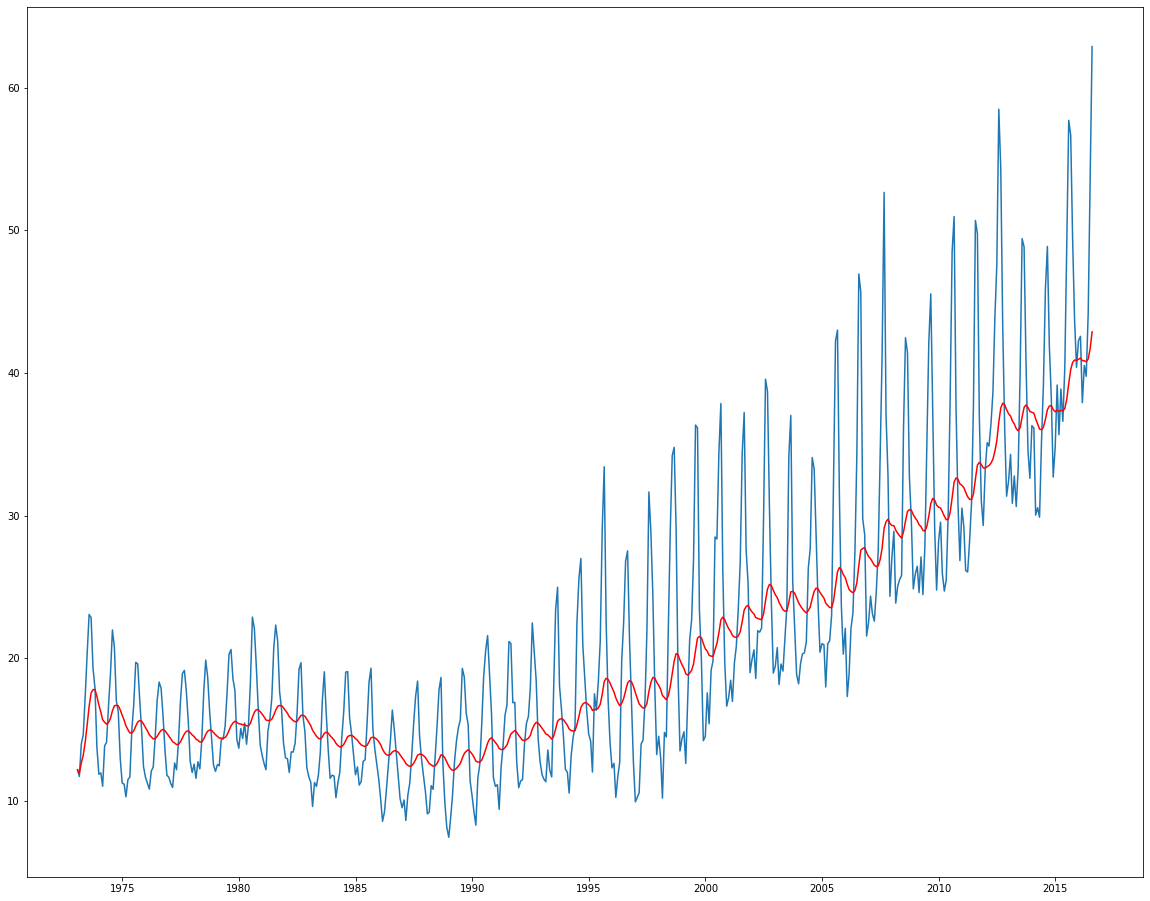

In [136]:
mte_exp_wighted_avg=mte.ewm(halflife=12).mean()
plt.plot(mte)
plt.plot(mte_exp_wighted_avg, color="red")

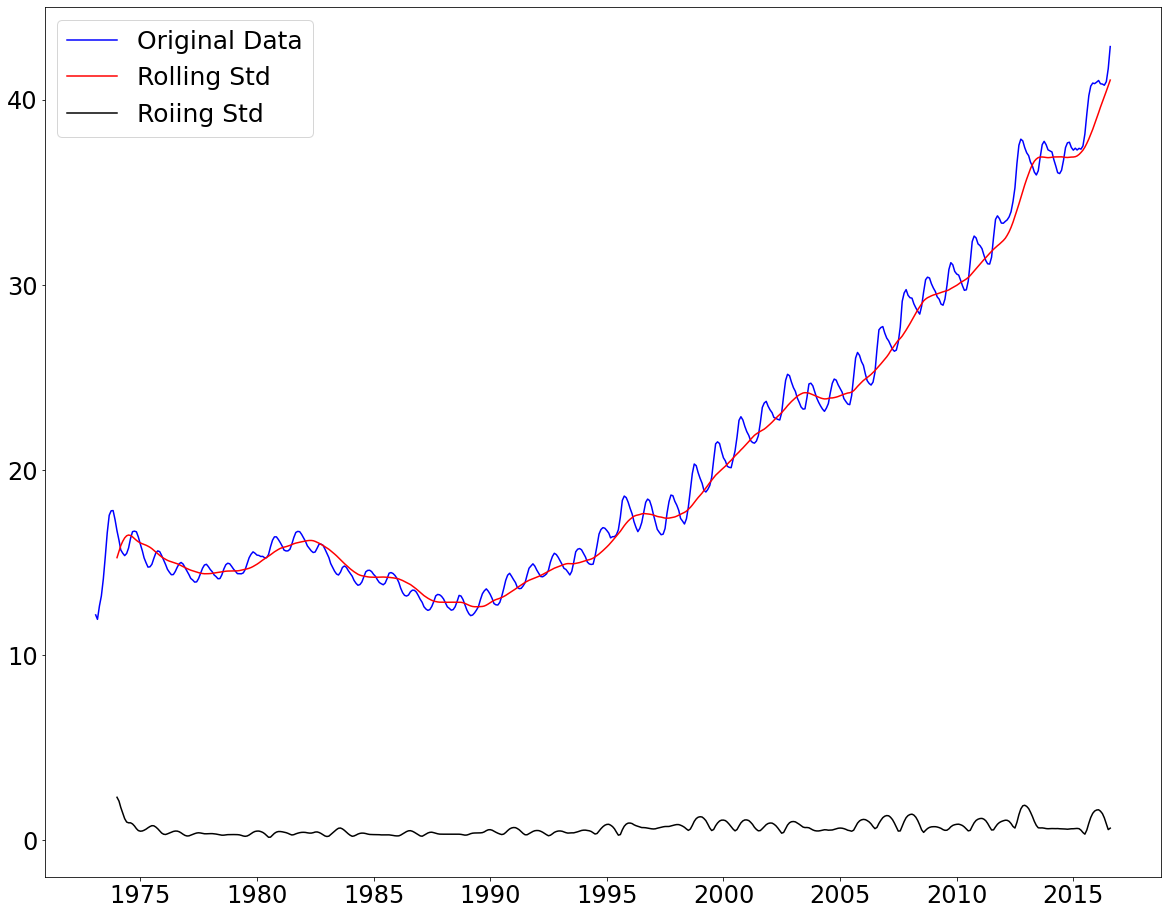

In [137]:
mte_ewma_diff=mte_exp_wighted_avg
TestStationaryPlot(mte_ewma_diff)

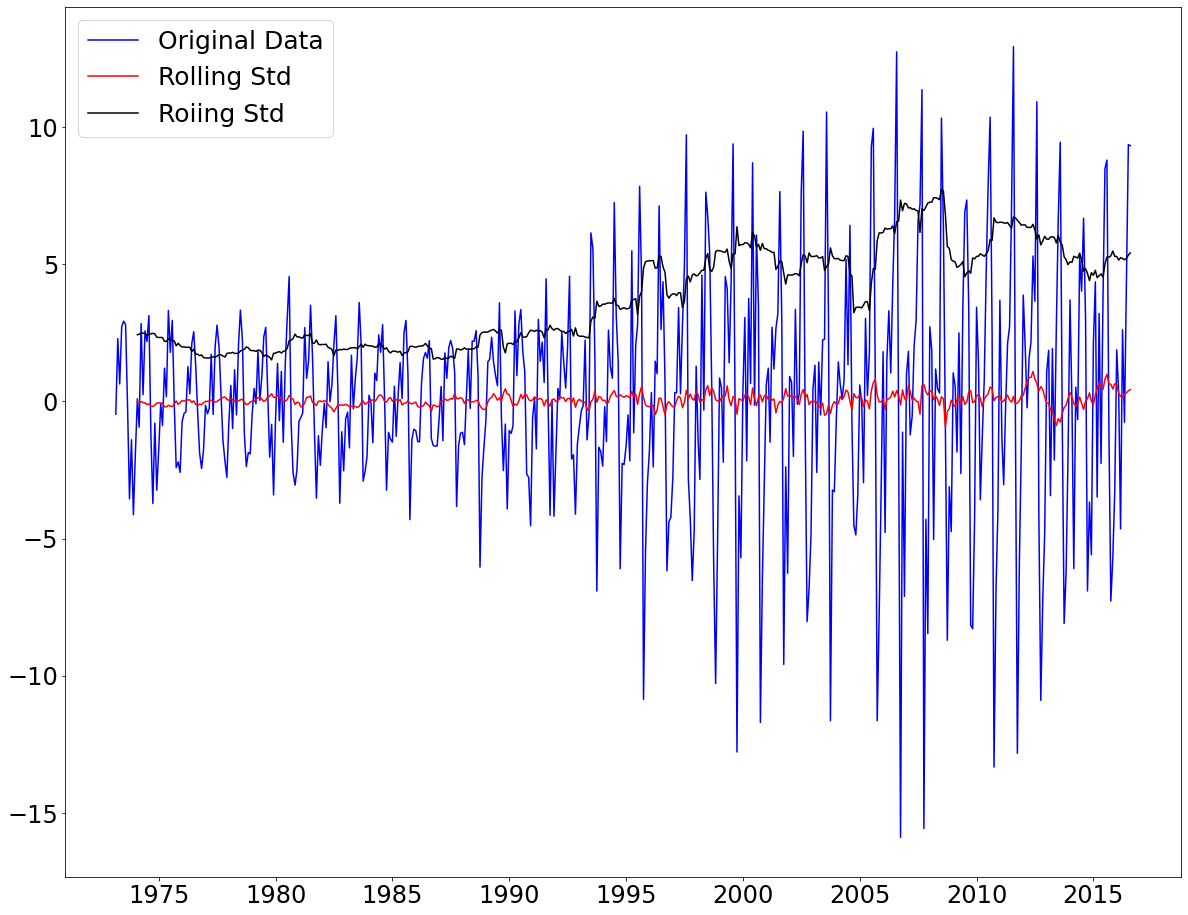

In [138]:
mte_first_difference=mte-mte.shift(1)
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [139]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test                     -5.435116
p-value                   0.000003
lags use                 18.000000
observations used       503.000000
Critical value (1%)      -3.443418
Critical value (5%)      -2.867303
Critical value (10%)     -2.569840
dtype: float64


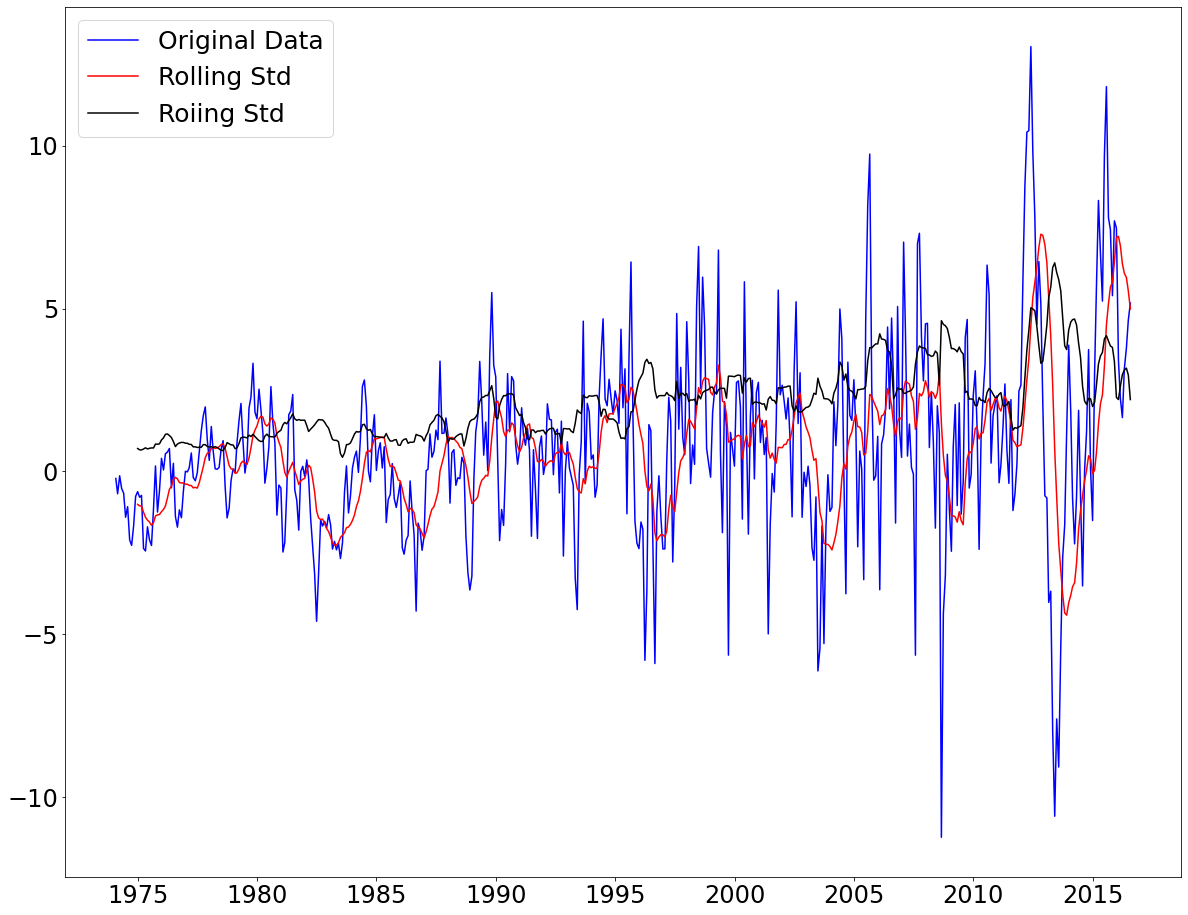

Test                     -4.412396
p-value                   0.000282
lags use                 13.000000
observations used       497.000000
Critical value (1%)      -3.443576
Critical value (5%)      -2.867373
Critical value (10%)     -2.569877
dtype: float64


In [140]:
mte_seasonal_difference=mte-mte.shift(12)
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

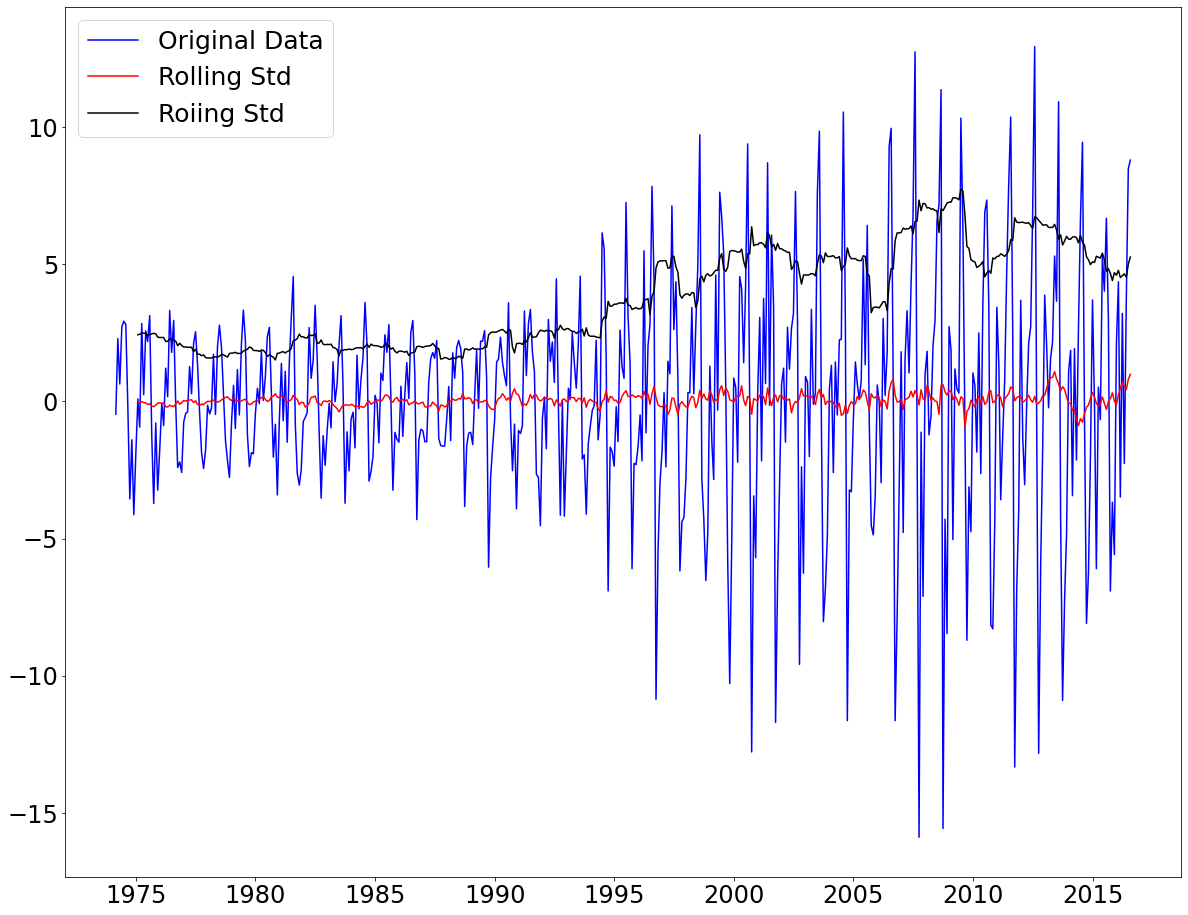

In [141]:
mte_seasonal_first_difference= mte_first_difference=mte_first_difference.shift(12)
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mte)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [143]:
print(trend)
print(seasonal)
print(residual)

YYYYMM
1973-01-31   NaN
1973-02-28   NaN
1973-03-31   NaN
1973-04-30   NaN
1973-05-31   NaN
              ..
2016-03-31   NaN
2016-04-30   NaN
2016-05-31   NaN
2016-06-30   NaN
2016-07-31   NaN
Freq: M, Name: trend, Length: 523, dtype: float64
YYYYMM
1973-01-31   -3.817798
1973-02-28   -5.369636
1973-03-31   -3.417147
1973-04-30   -3.109240
1973-05-31   -0.544521
                ...   
2016-03-31   -3.417147
2016-04-30   -3.109240
2016-05-31   -0.544521
2016-06-30    3.406900
2016-07-31    9.060271
Freq: M, Name: seasonal, Length: 523, dtype: float64
YYYYMM
1973-01-31   NaN
1973-02-28   NaN
1973-03-31   NaN
1973-04-30   NaN
1973-05-31   NaN
              ..
2016-03-31   NaN
2016-04-30   NaN
2016-05-31   NaN
2016-06-30   NaN
2016-07-31   NaN
Freq: M, Name: resid, Length: 523, dtype: float64


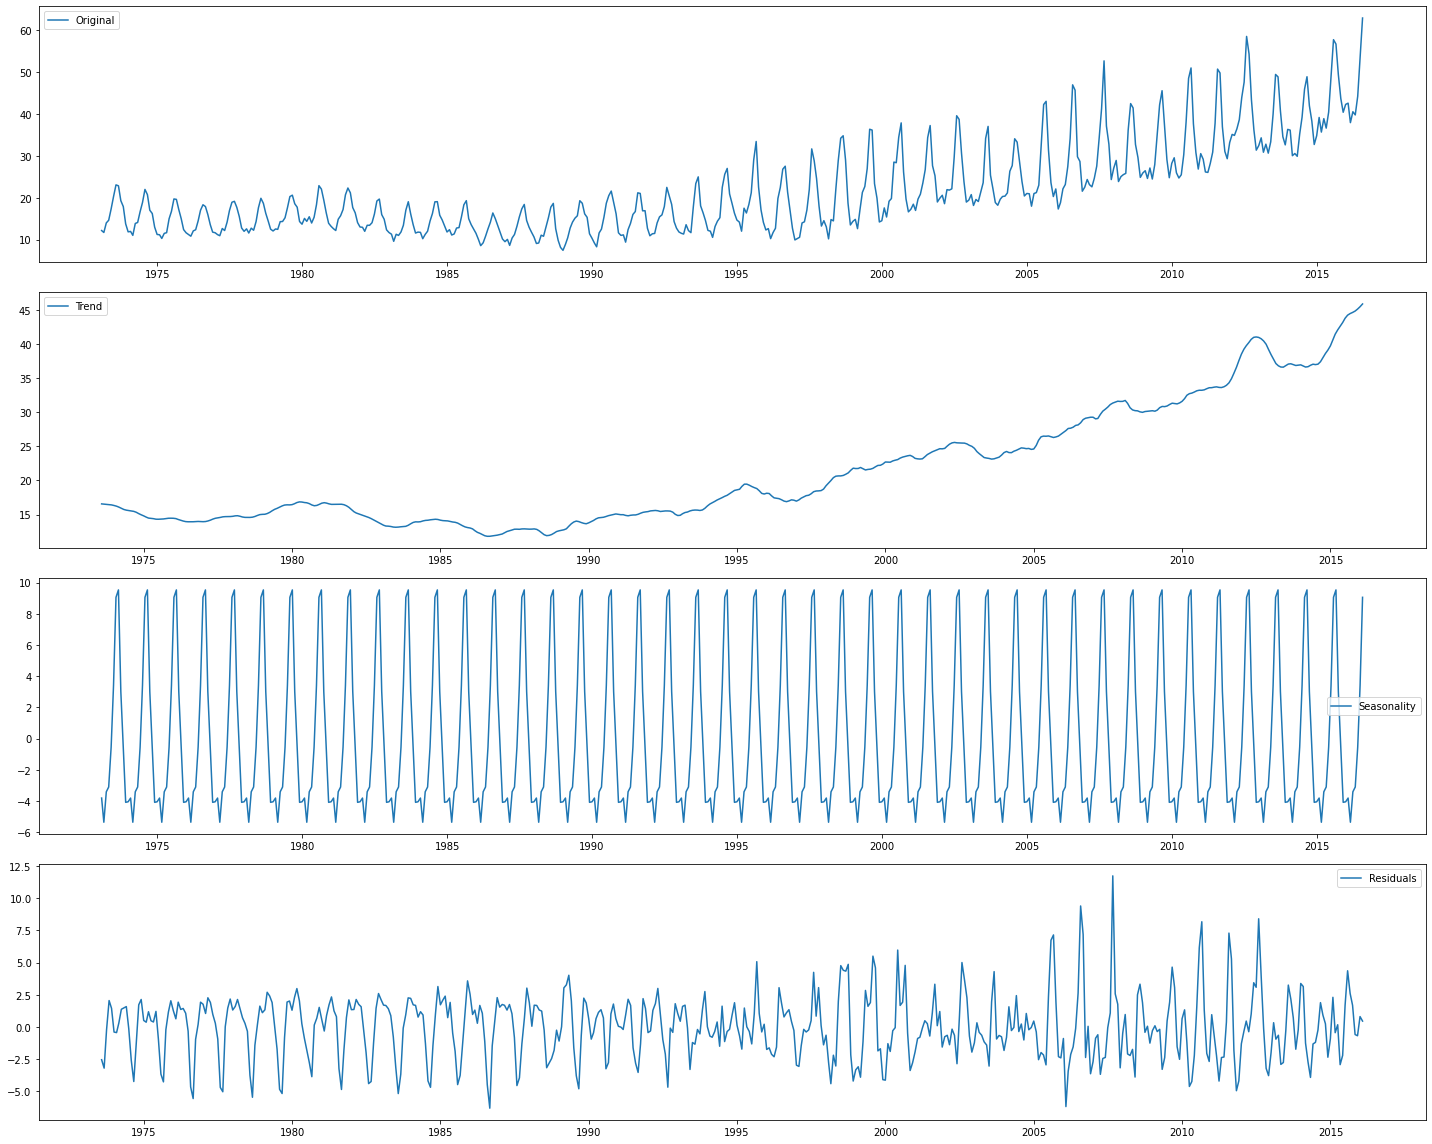

In [144]:
plt.subplot(411)
plt.plot(mte, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

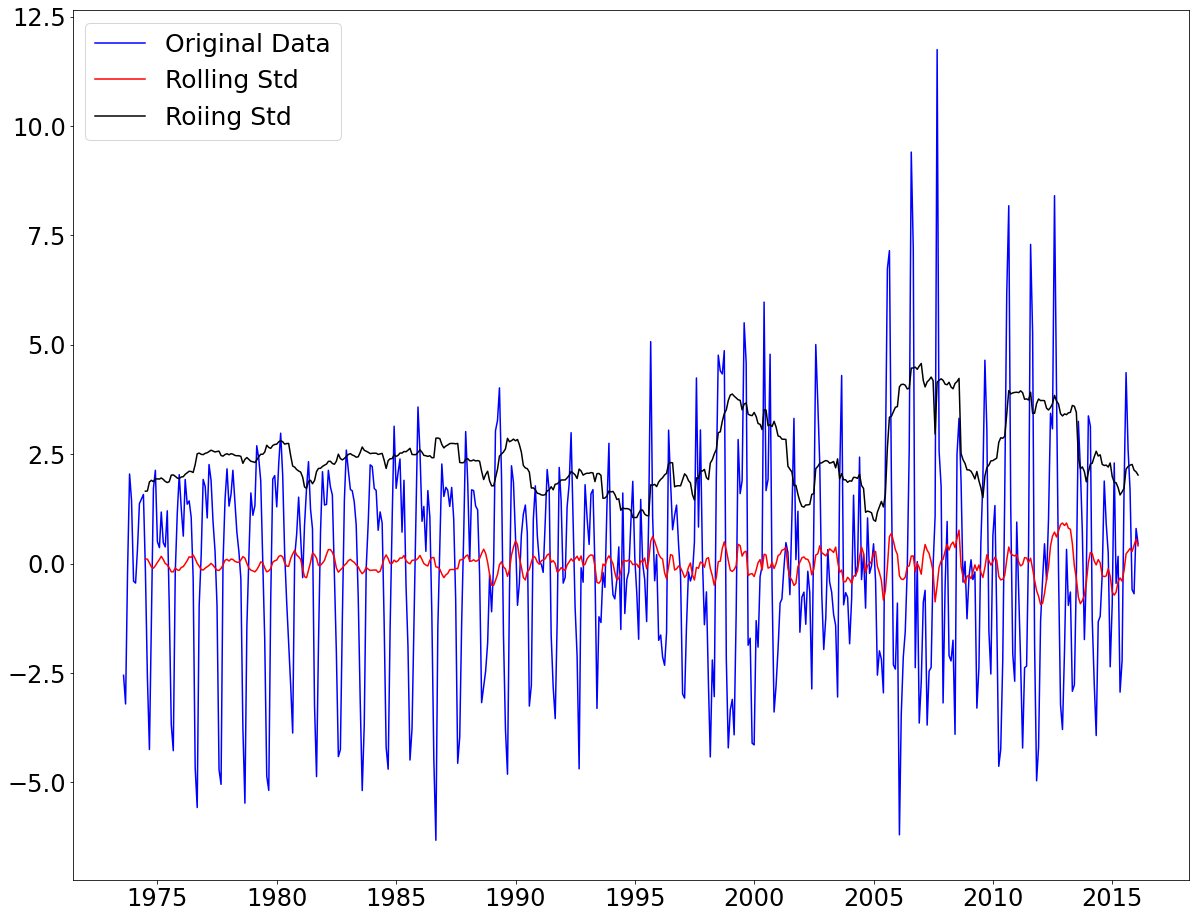

Test                   -8.547084e+00
p-value                 9.439345e-14
lags use                1.900000e+01
observations used       4.910000e+02
Critical value (1%)    -3.443739e+00
Critical value (5%)    -2.867444e+00
Critical value (10%)   -2.569915e+00
dtype: float64


In [145]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

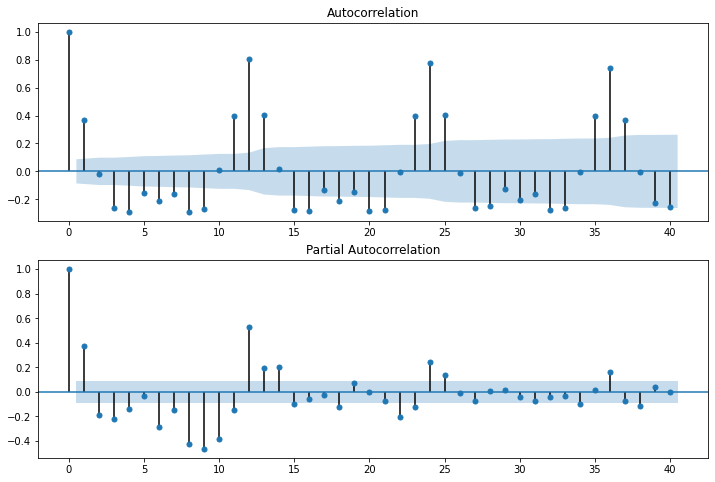

In [146]:
#얼마만큼 상관관계가 있는지
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [147]:
#최적의함수 찾기
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs=[]
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets

pdq_x_QDQs

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [153]:
a = []
b = []
c = []
wf = pd.DataFrame()
warnings.filterwarnings('ignore')
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility = False)
            result = mod.fit()
            print('ARIMA{} x {} - AIC : {}'.format(param, seasonal_param, result.aic))
            a.append(param)
            b.append(seasonal_param)
            c.append(result.aic)
        except:
            continue

wf['pdq'] =a
wf['pdq_x_QDQs'] = b
wf['aic'] = c
print(wf[wf['aic'] == wf['aic'].min()])

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC : 4804.065995091218
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC : 4135.625648186426
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC : 2572.194757744371
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC : 2504.2095028358435
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC : 2544.1464266167964
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC : 2465.147262997728
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC : 2511.043139693217
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC : 2505.8402380709176
ARIMA(0, 0, 1) x (0, 0, 0, 12) - AIC : 4157.561225515814
ARIMA(0, 0, 1) x (0, 0, 1, 12) - AIC : 3572.1059015549536
ARIMA(0, 0, 1) x (0, 1, 0, 12) - AIC : 2334.7247254087943
ARIMA(0, 0, 1) x (0, 1, 1, 12) - AIC : 2245.507386420748
ARIMA(0, 0, 1) x (1, 0, 0, 12) - AIC : 2329.0446013810656
ARIMA(0, 0, 1) x (1, 0, 1, 12) - AIC : 2218.680097756312
ARIMA(0, 0, 1) x (1, 1, 0, 12) - AIC : 2262.0627979899255
ARIMA(0, 0, 1) x (1, 1, 1, 12) - AIC : 2247.5327721889125
ARIMA(0, 1, 0) x (0, 0, 0, 12) - AIC : 2932.1335743055997
ARIMA(0, 1, 0) x (0, 0

In [161]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

In [162]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                              
===========================================================================================================
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Thu, 20 Oct 2022   AIC                           2003.553
Time:                                                     07:05:33   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6684      0.040     16.560      0.000       0.589       0.748
ma.L1         -0.9534      0.020    -46.799      0.000      -0.993      -0.914
ma.S.L12      -0.7287      0.027    -27.036      0.000      -0.782      -0.676
sigma2         3.2378      0.133     24.263      0.000       2.976       3.499
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               183.59
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               7.58   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

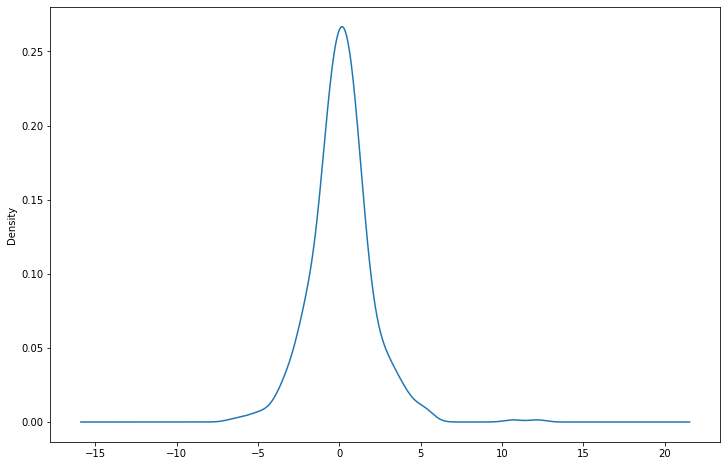

In [159]:
results.resid.plot(figsize=(12,8),kind="kde")

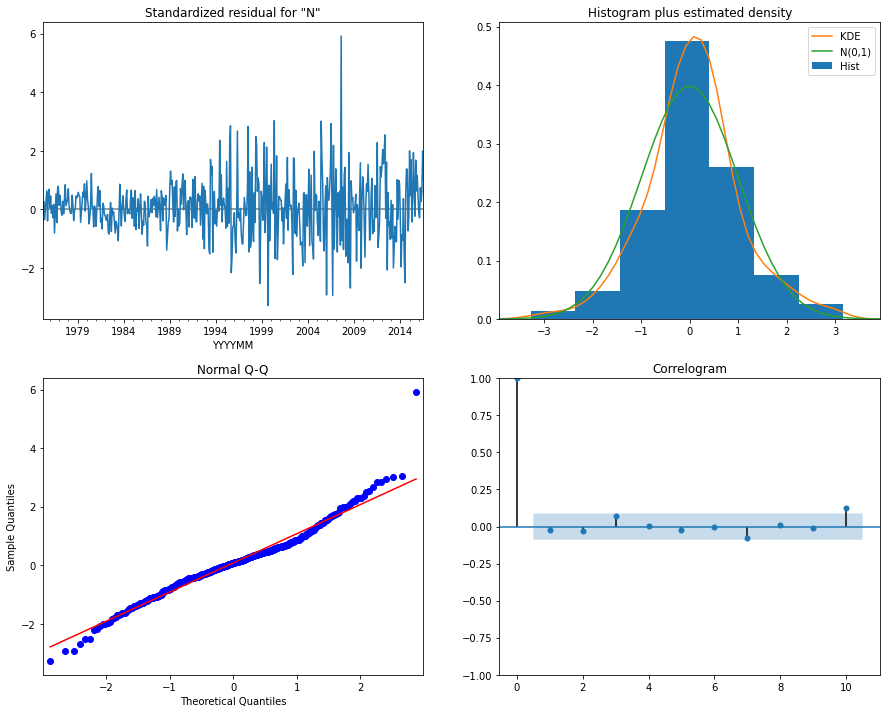

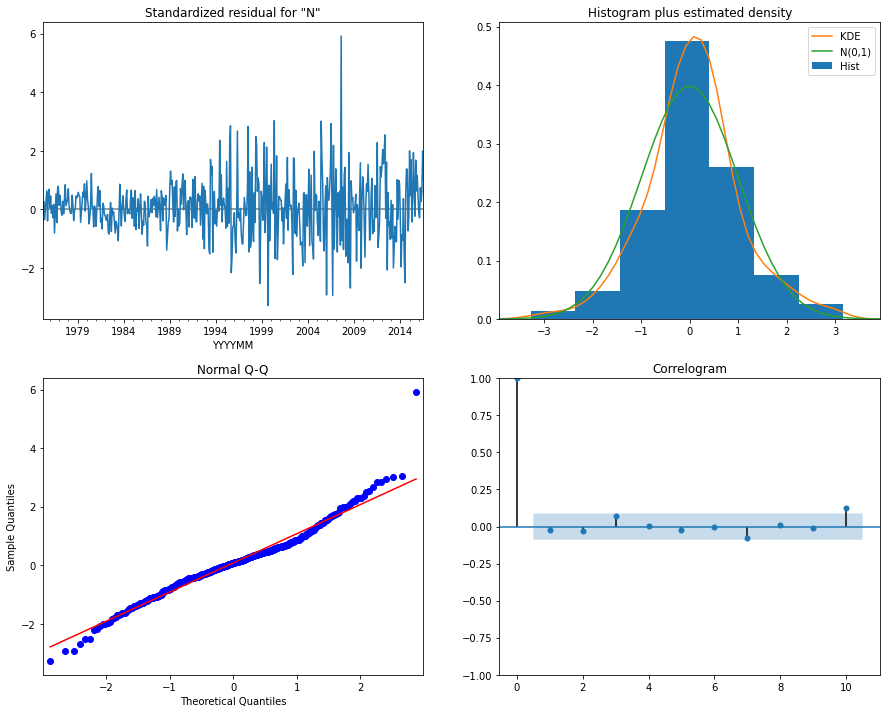

In [157]:
results.plot_diagnostics(figsize=(15, 12))

In [163]:
#예측한 결과값
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2013-01-31,30.203843,37.257332
2013-02-28,29.088387,36.141876
2013-03-31,28.958993,36.012482
2013-04-30,30.708079,37.761568
2013-05-31,32.104086,39.157575


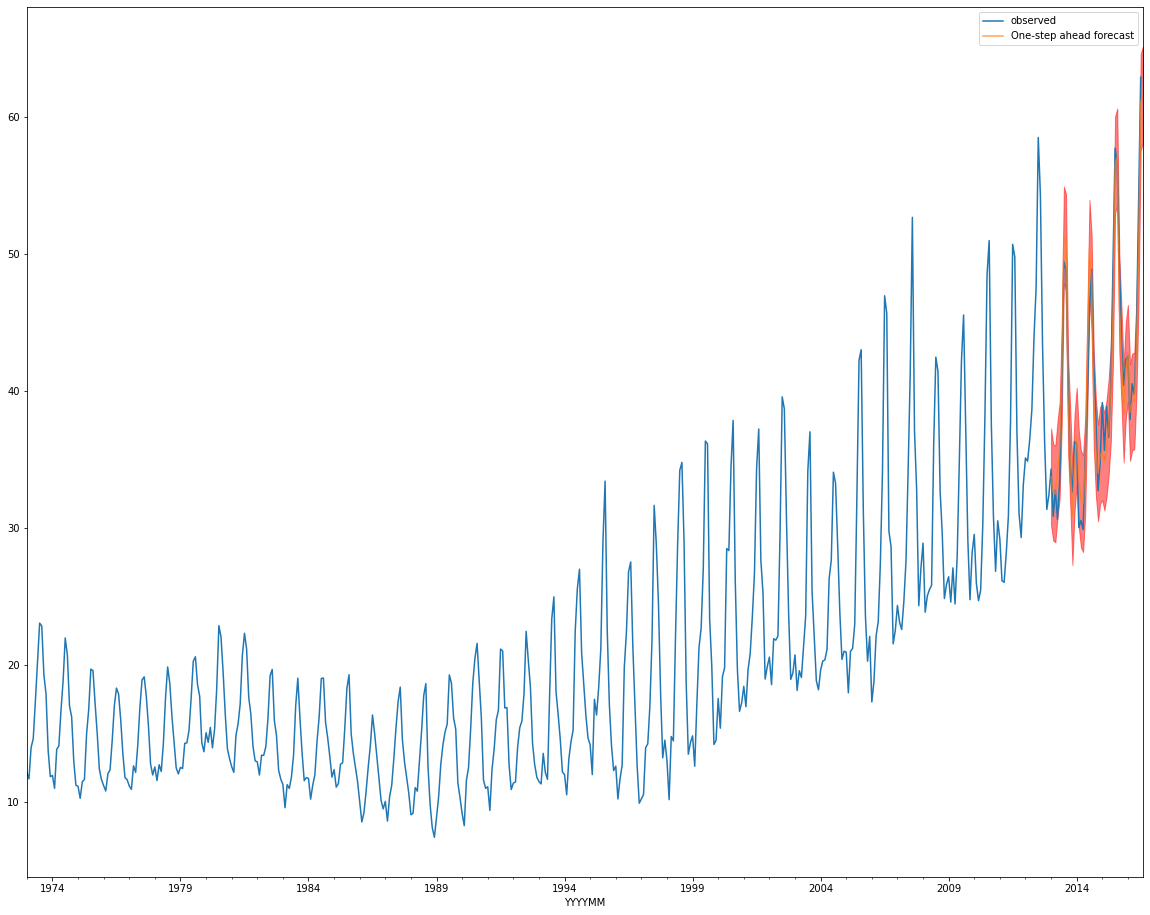

In [165]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

plt.legend()

plt.show()

In [166]:
## MSE 공식이용
mte_forecast = pred.predicted_mean #H
mte_truth = mte['2013-01-31':] #Y

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()

In [167]:
mse

4.094902260058042

In [168]:
forecast=result.get_forecast(steps=120)
forcast_ci=forecast.conf_int()
forcast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31,58.056662,65.107569
2016-09-30,47.308013,55.973112
2016-10-31,40.726248,50.144712
2016-11-30,36.165378,45.988927
2016-12-31,38.085042,48.149998


In [175]:
forcast_ci.iloc[:0]

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions


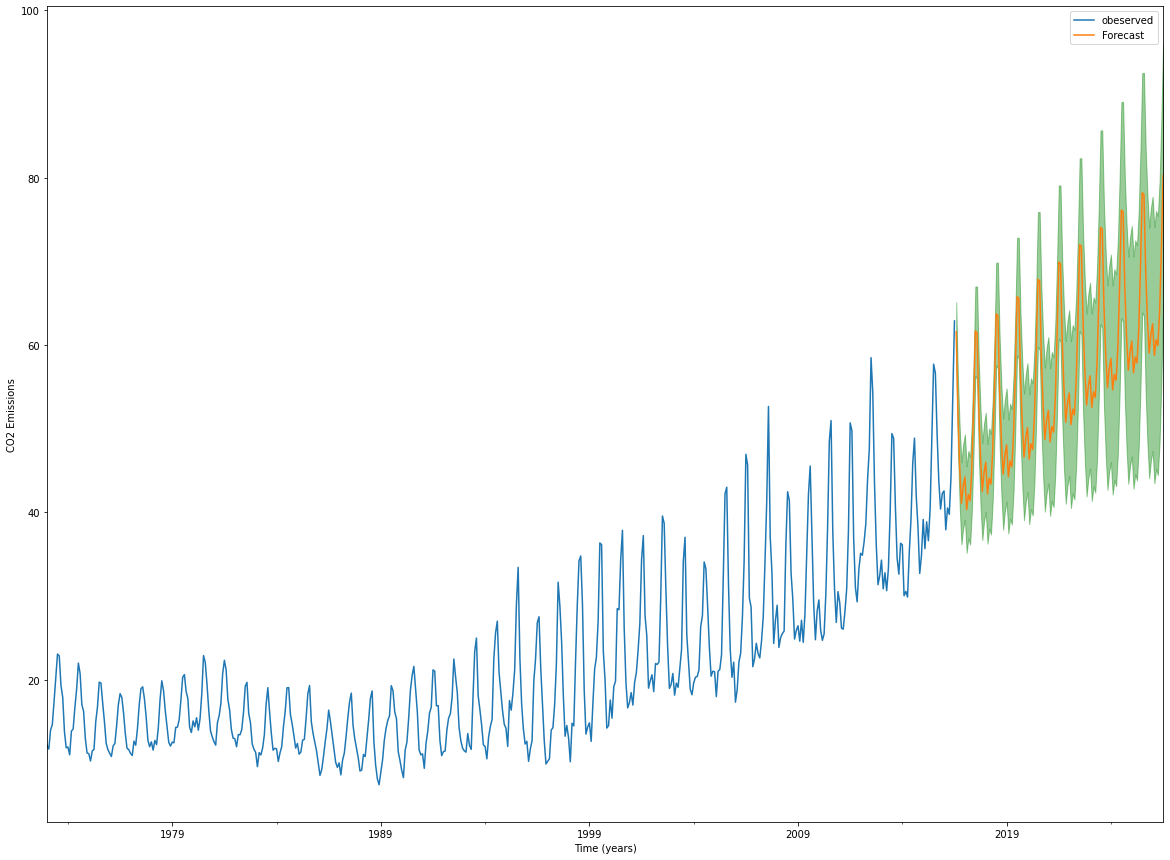

In [170]:
ax=mte.plot(label="obeserved",figsize=(20,15))
forecast.predicted_mean.plot(ax=ax,label="Forecast")
ax.fill_between(forcast_ci.index,
                forcast_ci.iloc[:,0],
                forcast_ci.iloc[:,1],color="g",alpha=.4)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()